In [44]:
import pandas as pd
import os
import tqdm

datos_path = 'C:/Users/santi/GNN4OPF/'

### Para generar el csv con los 3 años concatenados

In [38]:
GEN = pd.read_excel(datos_path+'GEN.xlsx', sheet_name='2021')

In [39]:
GEN2 = pd.read_excel(datos_path+'GEN.xlsx', sheet_name='2022')
GEN3 = pd.read_excel(datos_path+'GEN.xlsx', sheet_name='2023')

In [40]:
df_concatenado = pd.concat([GEN, GEN2, GEN3])

In [ ]:
df_concatenado.to_csv(datos_path + 'GEN_total.csv', index=False)

In [3]:
GEN_loaded = pd.read_csv(datos_path+'GEN_total.csv')

C:\Users\santi\AppData\Local\Temp\ipykernel_33412\81847354.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

In [9]:
GEN_loaded['Fecha']

dtype('O')

## Funcion para levantar las columnas con los nodos que querramos, y guardar en un csv con los nombres de los buses

In [100]:
def create_dataset(path, buses, out_dir=None):

    original_data = pd.read_csv(path).drop(0)
    clean_data = pd.DataFrame(columns=buses.keys())
    clean_data['Fecha'] = original_data['Fecha']
    clean_data['Fecha'] = pd.to_datetime(clean_data['Fecha'])
    original_data = original_data.applymap(convertir_a_cero)
    # chequeo de colunmas
    for bus in buses:
        if bus not in original_data.columns:
            raise ValueError(f'Column {bus} not found in the dataset')
        
    for bus in tqdm.tqdm(buses, desc='Cleaning data',total=len(buses)):
        if bus != 'Fecha':
            if buses[bus] in clean_data.columns:
                clean_data[buses[bus]] += original_data[bus].astype('float32')
                # remove column from clean_data
                clean_data.drop(bus, axis=1, inplace=True)
            else:
                clean_data[bus] = original_data[bus].astype('float32')
                clean_data = clean_data.rename(columns={bus: buses[bus]})
    if out_dir:
        clean_data.to_csv(out_dir, index=False)

    return clean_data

def convertir_a_cero(elemento):
    if isinstance(elemento, str):
        return 0
    else:
        return elemento
    
def map_gen(path_to_mapeo, pgen = True):
    mapeo = pd.read_excel(path_to_mapeo,sheet_name="generadores_mapeo_v1")
    mapeo = mapeo.loc[:, ['bus', 'gen', 'bus_name', 'pgen', 'qgen']].dropna()
    mapeo['bus'] = mapeo['bus'].astype(int).astype(str)
    mapeo['gen'] = mapeo['gen'].astype(str)
    mapeo['bus_gen_sum'] = mapeo['bus'] + '_' + mapeo['gen']
    if pgen:
        mapeo_dict = mapeo.set_index('bus_gen_sum')['pgen'].to_dict()
    else:
        mapeo_dict = mapeo.set_index('bus_gen_sum')['qgen'].to_dict()
    mapeo_dict = {v: k for k, v in mapeo_dict.items()}
    mapeo_dict['Fecha'] = 'Fecha'
    return mapeo_dict


### Pgen

In [35]:
buses_pgen = map_gen(datos_path+'Mapeo-PSSE_SCADA.xlsx', pgen=True)

In [ ]:
create_dataset(datos_path+'GEN_total.csv', buses_pgen,datos_path + 'GENP_total_psse.csv')

In [221]:
# Las dos celdas anteriores eran con los datos de Gen de Enzo, ahora usamos los de ADME.
# Cargo la generacion de ADME concatenados los 6 archivos xlsx y lo filtro con la fecha que tiene Pload
Gen = pd.read_csv(datos_path+'GENP_total_pp_uy.csv')
Pload = pd.read_csv(datos_path+'LOADP_total_pandapower.csv')
Gen['Fecha'] = pd.to_datetime(Gen['Fecha'])
Gen_filtered = Gen[Gen['Fecha'].isin(Pload['Fecha'])].reset_index(drop=True)
Gen_filtered.to_csv(datos_path + 'GENP_total_pandapower.csv', index=False)

### Qgen

In [31]:
buses_qgen = map_gen(datos_path+'Mapeo-PSSE_SCADA.xlsx', pgen=False)

In [32]:
create_dataset(datos_path+'GEN_total.csv', buses_qgen, datos_path + 'GENQ_total_psse.csv')

C:\Users\santi\AppData\Local\Temp\ipykernel_23392\2311669867.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,4000_1,4000_2,4000_3,4000_4,4000_5,4000_6,4000_7,90000_1,90000_2,90000_3,...,92700_1,92700_C1,92700_C2,92710_G1,92760_1,92760_G1,92790_1,92790_2,92790_G1,Fecha
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.000000,0,0.00,0.0,0.0,0.00000,0.0,0.000000,2021-07-01 00:00:00
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.000000,0,0.00,0.0,0.0,0.00000,0.0,0.000000,2021-07-01 00:10:00
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.000000,0,0.00,0.0,0.0,0.00000,0.0,0.000000,2021-07-01 00:20:00
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.000000,0,0.00,0.0,0.0,0.00000,0.0,0.000000,2021-07-01 00:30:00
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.000000,0,0.00,0.0,0.0,0.00000,0.0,0.000000,2021-07-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135934,11.7,11.500000,11.200000,11.900001,11.3,12.200000,11.500000,11.500000,12.3,11.700000,...,-0.653,5.083614,0,-9.35,0.0,0.0,3.78000,0.0,1.029848,2024-01-30 23:20:00
135935,11.7,11.500000,10.900001,11.300000,11.2,11.800000,11.500000,10.700000,11.6,11.800000,...,-0.653,5.083614,0,-10.97,0.0,0.0,4.48875,0.0,1.029848,2024-01-30 23:30:00
135936,11.0,11.400001,10.900001,11.700000,11.2,11.800000,11.500000,10.900001,11.6,11.800000,...,-0.653,5.083614,0,-9.89,0.0,0.0,5.19750,0.0,1.029848,2024-01-30 23:40:00
135937,12.2,12.000000,11.400001,12.100000,11.2,12.400001,11.500000,11.100000,11.6,11.900001,...,-0.969,5.083614,0,-12.12,0.0,0.0,5.19750,0.0,1.029848,2024-01-30 23:50:00


### Pload

In [80]:
entradas = [
    (92670, "ACORRIEN.000 ES CAR MED P.AV"),
    (92060, "ARAPEY.000 ES CAR MED P.AV"),
    (92090, "ARTIGAS.000 ES CAR MED P.AV"),
    (92710, "BIFURCAC.000 ES CAR MED P.AV"),
    (92710, "BIFURCAC.000 ES CAR MED P.AV.1"),  # Esta repetido, lo ponemos pq la suma de cargas da parecido a la suma de generación
    (92540, "BONETE.000 ES CAR MED P.AV"),
    (92600, "COLONIA.000 ES CAR MED P.AV"),
    (92690, "CONCHILL.000 ES CAR MED P.AV"),
    (92940, "DOLORES.000 ES CAR MED P.AV"),
    (92531, "DURAZNO.000 ES CAR MED P.AV"),
    (92681, "EFICE.000 ES CAR MED P.AV"),
    (92440, "EMARTINE.000 ES CAR MED P.AV"),
    (92050, "FBENTOS.000 ES CAR MED P.AV"),
    (92520, "FLORIDA.000 ES CAR MED P.AV"),
    (92620, "LIBERTAD.000 ES CAR MED P.AV"),
    (92730, "MALDONAD.000 ES CAR MED P.AV"),
    (92450, "MELO.000 ES CAR MED P.AV"),
    (92640, "MERCEDES.000 ES CAR MED P.AV"),
    (92100, "MVA150.000 ES CAR MED P.AV"),
    (90200, "MVB150.000 ES CAR MED P.AV"),
    (92210, "MVC150.000 ES CAR MED P.AV"),
    (92240, "MVE150.000 ES CAR MED P.AV"),
    (92310, "MVF150.000 ES CAR MED P.AV"),
    (92320, "MVG150.000 ES CAR MED P.AV"),
    (92330, "MVH150.000 ES CAR MED P.AV"),
    (92270, "MVJ150.000 ES CAR MED P.AV"),
    (92340, "MVK150.000 ES CAR MED P.AV"),
    (92180, "MVM150.000 ES CAR MED P.AV"),
    (92350, "MVR150.000 ES CAR MED P.AV"),
    (92110, "NORTE.000 ES CAR MED P.AV"),
    (92650, "NPALMIRA.000 ES CAR MED P.AV"),
    (92500, "PAL150.000 ES CAR MED P.AV"),
    (92770, "PANDO.000 ES CAR MED P.AV"),
    (92030, "PAYSANDU.000 ES CAR MED P.AV"),
    (92721, "PAZUCAR.000 ES CAR MED P.AV"),
    (101,   "PESTE.000 ES CAR MED P.AV"),
    (92280, "PIEDRAS.000 ES CAR MED P.AV"),
    (92400, "RIVERA.000 ES CAR MED P.AV"),
    (92760, "ROCHA.000 ES CAR MED P.AV"),
    (92580, "RODRIGUE.000 ES CAR MED P.AV"),
    (92610, "ROSARIO.000 ES CAR MED P.AV"),
    (92040, "SALTO.000 ES CAR MED P.AV"),
    (92700, "SCA150.000 ES CAR MED P.AV"),
    (92380, "SOLYMAR.000 ES CAR MED P.AV"),
    (92470, "MDIAZ.000 ES CAR MED P.AV"),
    (92630, "SVAZQUEZ.000 ES CAR MED P.AV"),
    (92410, "TAC150.000 ES CAR MED P.AV"),
    (92070, "TGOMENSO.000 ES CAR MED P.AV"),
    (92590, "TRINIDAD.000 ES CAR MED P.AV"),
    (92430, "TYTRES.000 ES CAR MED P.AV"),
    (92420, "VALENTIN.000 ES CAR MED P.AV"),
    (92020, "YOUNG.000 ES CAR MED P.AV"),
    (92790, "BONETEB.000 ES CAR MED P.AV"),
    (92050, "BOTNIA.000 ES CAR MED P.AV"),
    (92124, "MVL150.000 ES CAR MED P.AV"),
    (92710, "PLATA.000 ES CAR MED P.AV"),
    (92770, "SUAREZ.000 ES CAR MED P.AV")
]

# Creación del diccionario con manejo de claves duplicadas
diccionario = {j:i for i,j in entradas}

diccionario['Fecha'] = 'Fecha'
# Mostrar el diccionario resultante
for k, v in diccionario.items():
    print(f"{k}: {v}")  

ACORRIEN.000 ES CAR MED P.AV: 92670
ARAPEY.000 ES CAR MED P.AV: 92060
ARTIGAS.000 ES CAR MED P.AV: 92090
BIFURCAC.000 ES CAR MED P.AV: 92710
BIFURCAC.000 ES CAR MED P.AV.1: 92710
BONETE.000 ES CAR MED P.AV: 92540
COLONIA.000 ES CAR MED P.AV: 92600
CONCHILL.000 ES CAR MED P.AV: 92690
DOLORES.000 ES CAR MED P.AV: 92940
DURAZNO.000 ES CAR MED P.AV: 92531
EFICE.000 ES CAR MED P.AV: 92681
EMARTINE.000 ES CAR MED P.AV: 92440
FBENTOS.000 ES CAR MED P.AV: 92050
FLORIDA.000 ES CAR MED P.AV: 92520
LIBERTAD.000 ES CAR MED P.AV: 92620
MALDONAD.000 ES CAR MED P.AV: 92730
MELO.000 ES CAR MED P.AV: 92450
MERCEDES.000 ES CAR MED P.AV: 92640
MVA150.000 ES CAR MED P.AV: 92100
MVB150.000 ES CAR MED P.AV: 90200
MVC150.000 ES CAR MED P.AV: 92210
MVE150.000 ES CAR MED P.AV: 92240
MVF150.000 ES CAR MED P.AV: 92310
MVG150.000 ES CAR MED P.AV: 92320
MVH150.000 ES CAR MED P.AV: 92330
MVJ150.000 ES CAR MED P.AV: 92270
MVK150.000 ES CAR MED P.AV: 92340
MVM150.000 ES CAR MED P.AV: 92180
MVR150.000 ES CAR MED P.AV:

In [142]:
# create_dataset(datos_path+'Carga Activa.csv', diccionario, datos_path + 'LOADP_total_psse.csv')
clean_data = create_dataset(datos_path+'Carga Activa.csv', diccionario)

C:\Users\santi\AppData\Local\Temp\ipykernel_40328\800667551.py:3: DtypeWarning: Columns (3,4,11,15,16,48,50,58,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv(path).drop(0)


1         2021-03-21 00:00:00
2         2021-03-21 00:10:00
3         2021-03-21 00:20:00
4         2021-03-21 00:30:00
5         2021-03-21 00:40:00
                 ...         
135500    2023-10-17 23:10:00
135501    2023-10-17 23:20:00
135502    2023-10-17 23:30:00
135503    2023-10-17 23:40:00
135504    2023-10-17 23:50:00
Name: Fecha, Length: 135504, dtype: object


Cleaning data: 100%|██████████| 58/58 [00:07<00:00,  8.22it/s]


In [143]:
clean_data

,92670,92060,92090,92710,92540,92600,92690,92940,92531,92681,...,92630,92410,92070,92590,92430,92420,92020,92790,92124,Fecha
1,9.54016,2.8500,9.809999,67.470482,4.399368,11.598300,0.587500,0.000,17.590748,4.980417,...,20.700001,17.437859,2.056735,5.57550,31.130756,6.30943,0.000000,0.000,30.671249,2021-03-21 00:00:00
2,9.54016,2.8500,9.809999,67.916039,4.399368,11.598300,0.587500,0.000,17.590748,4.980417,...,20.160000,17.437859,2.056735,5.57550,31.130756,5.79276,0.000000,0.000,30.671249,2021-03-21 00:10:00
3,9.54016,2.8500,9.270000,66.593666,4.399368,11.598300,0.587500,0.000,17.040976,4.980417,...,20.160000,17.451233,2.056735,5.05386,30.539799,5.79276,0.000000,0.000,29.980408,2021-03-21 00:20:00
4,9.54016,2.8500,9.270000,66.196037,4.399368,11.598300,0.587500,0.000,16.520864,4.980417,...,19.420000,16.903900,2.056735,5.05386,29.995466,5.79276,0.000000,0.000,29.199921,2021-03-21 00:30:00
5,9.54016,2.8500,8.712000,65.741394,4.399368,11.598300,0.587500,0.000,16.520864,4.980417,...,18.840000,16.903900,2.056735,5.05386,29.995466,5.79276,0.000000,0.000,29.199921,2021-03-21 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135500,0.00000,2.8809,8.794800,78.159515,0.452673,18.341820,0.004167,6.066,18.642984,9.855135,...,21.900000,9.614657,6.041055,6.81912,30.337517,6.41386,9.182652,5.031,32.851040,2023-10-17 23:10:00
135501,0.00000,2.8809,9.306000,79.257523,0.452673,18.341820,0.004167,6.066,19.722120,10.275838,...,21.900000,9.719620,5.550055,6.81912,30.854441,6.41386,9.182652,5.031,32.851040,2023-10-17 23:20:00
135502,0.00000,2.8809,9.306000,76.257240,0.452673,18.850861,0.004167,6.066,19.722120,8.710971,...,21.900000,9.719620,6.222254,6.81912,30.854441,6.41386,9.182652,5.031,32.851040,2023-10-17 23:30:00
135503,0.00000,2.3802,9.306000,75.339241,0.452673,18.338039,0.004167,6.066,19.203396,10.263849,...,21.900000,9.059999,6.036455,6.31260,30.854441,6.41386,9.182652,5.031,32.851040,2023-10-17 23:40:00


In [189]:
clean_data.groupby(clean_data['Fecha'].dt.floor('H')).mean()

C:\Users\santi\AppData\Local\Temp\ipykernel_40328\342154862.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_data.groupby(clean_data['Fecha'].dt.floor('H')).mean()


,92670,92060,92090,92710,92540,92600,92690,92940,92531,92681,...,92470,92630,92410,92070,92590,92430,92420,92020,92790,92124
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-03-21 00:00:00,9.54016,2.850000,9.2640,66.376122,4.399368,11.598300,0.587500,0.000000,16.964178,4.980417,...,0.0315,19.686666,17.080276,2.056735,5.22774,30.464617,5.878872,0.000000,0.00000,29.633230
2021-03-21 01:00:00,9.10546,2.850000,8.3496,58.543438,4.180183,10.866660,0.535416,0.000000,15.766742,4.980417,...,0.0315,18.240000,15.778558,1.992122,4.71114,28.542816,5.077523,0.000000,0.00000,26.578936
2021-03-21 02:00:00,9.01852,2.850000,7.8324,56.421986,3.741814,10.072440,0.483333,0.000000,14.922965,4.980417,...,0.0315,16.699999,14.660213,1.669057,4.37220,27.347145,4.726720,0.000000,0.00000,24.219000
2021-03-21 03:00:00,9.01852,2.850000,7.6644,54.428379,3.741814,9.554580,0.483333,0.000000,14.490529,4.980417,...,0.0315,16.153334,13.965443,1.669057,4.03704,27.032219,4.494330,0.000000,0.00000,22.805674
2021-03-21 04:00:00,9.01852,2.850000,7.1424,50.567188,3.741814,9.468900,0.483333,0.000000,14.237397,4.980417,...,0.0315,15.780002,13.598366,1.669057,4.03704,26.920113,4.305740,0.000000,0.00000,22.201859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 19:00:00,0.00000,3.762196,10.7394,73.883484,0.452673,19.220041,0.004167,8.000000,21.926329,9.557106,...,0.0240,20.073334,12.062440,6.495916,6.64776,29.380938,8.014277,10.833634,5.19675,33.160610
2023-10-17 20:00:00,0.00000,3.933601,11.5020,82.466133,0.452673,21.341461,0.004167,8.637000,22.987251,10.168125,...,0.0240,22.506668,12.740796,6.850754,7.37100,32.156780,8.642970,11.400250,5.65050,37.177544
2023-10-17 21:00:00,0.00000,3.672750,10.5396,82.459183,0.452673,21.240030,0.004167,8.539001,21.594454,9.971496,...,0.0240,22.870001,11.816648,6.553221,7.27902,32.543812,8.354990,11.065452,5.81625,37.553158


In [212]:

# promedio valores de clean_data cada una hora
clean_data['Fecha'] = pd.to_datetime(clean_data['Fecha'])
clean_data_filtered = clean_data.groupby(clean_data['Fecha'].dt.floor('H')).mean().reset_index()
clean_data_filtered

# Agrego las columnas que son importacion y exportacion al csv de carga activa y lo guardo (la impo y expo se guardan como cargas)
imp_exp = pd.read_csv(datos_path+'imp_exp_argbra.csv')
imp_exp['Fecha'] = pd.to_datetime(imp_exp['Fecha'])
# imp_exp_filtered es imp_exp desde la fecha inicial de clean data hasta la fecha final de clean data
imp_exp_filtered = imp_exp[imp_exp['Fecha'].isin(clean_data_filtered['Fecha'])].reset_index(drop=True)
# concatenamos las dos columnas
concat = pd.concat([clean_data_filtered, imp_exp_filtered.drop('Fecha', axis=1, inplace=True)], axis=1)
concat.to_csv('C:/Users/santi/GNN4OPF/LOADP_total_pandapower.csv', index=False)

C:\Users\santi\AppData\Local\Temp\ipykernel_40328\677096273.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_data_filtered = clean_data.groupby(clean_data['Fecha'].dt.floor('H')).mean().reset_index()


### Qload

In [49]:
entradas = [
    # (92670, None),
    (92060, "ARAPEY.150 TR TR1 MED Q.AV"),
    (92090, "ARTIGAS.150 TR TR1 MED Q.AV"),
    # (92710, None),
    # (92540, None),
    # (92600, None),
    # (92690, None),
    (92940, "DOLORES.150 TR TR1 MED Q.AV"),
    (92531, "DURAZNO.150 TR TR3 MED Q.AV"),
    (92681, "EFICE.150 TR TR1 MED Q.AV"),
    # (92440, None),
    # (92050, None),
    # (92520, None),
    # (92620, None),
    # (92730, None),
    (92450, "MELO.150 TR TR3 MED Q.AV"),
    # (92640, None),
    (92100, "MVA150.150 TR TR1 MED Q.AV"),
    (90200, "MVB150.030 TR TR1 MED Q.AV"),
    (92210, "MVC150.030 TR TR1 MED Q.AV"),
    (92240, "MVE150.010 TR TR3 MED Q.AV"),
    (92310, "MVF150.022 TR TR3 MED Q.AV"),
    (92320, "MVG150.022 TR TR1 MED Q.AV"),
    (92330, "MVH150.030 TR TR3 MED Q.AV"),
    (92270, "MVJ150.030 TR TR2 MED Q.AV"),
    (92340, "MVK150.030 TR TR1 MED Q.AV"),
    (92180, "MVM150.030 TR TR1 MED Q.AV"),
    (92350, "MVR150.022 TR TR1 MED Q.AV"),
    (92110, "NORTE.150 TR TR1 MED Q.AV"),
    (92650, "NPALMIRA.150 TR TR1 MED Q.AV"),
    (92500, "PAL150.030 TR TR1 MED Q.AV"),
    (92770, "PANDO.150 TR TR3 MED Q.AV"),
    (92030, "PAYSANDU.150 TR TR3 MED Q.AV"),
    # (92721, None),
    # (101, None),
    (92280, "PIEDRAS.150 TR TR3 MED Q.AV"),
    # (92400, None),
    # (92760, None),
    (92580, "RODRIGUE.150 L1 TRI MED Q.AV"),
    (92610, "ROSARIO.150 TR TR1 MED Q.AV"),
    (92040, "SALTO.150 TR TR1 MED Q.AV"),
    (92700, "SCA150.030 TR TR1 MED Q.AV"),
    (92380, "SOLYMAR.150 TR TR3 MED Q.AV"),
    # (92470, None),
    (92630, "SVAZQUEZ.150 TR TR3 MED Q.AV"),
    (92410, "TAC150.030 TR TR1 MED Q.AV"),
    (92070, "TGOMENSO.150 TR TR2 MED Q.AV"),
    (92590, "TRINIDAD.150 TR TR1 MED Q.AV"),
    (92430, "TYTRES.150 TR TR3 MED Q.AV"),
    (92420, "VALENTIN.150 TR TR2 MED Q.AV"),
    (92020, "YOUNG.150 TR TR2 MED Q.AV")
]

# Creación del diccionario con manejo de claves duplicadas
diccionario = {j:i for i,j in entradas}

diccionario['Fecha'] = 'Fecha'
# Mostrar el diccionario resultante
for k, v in diccionario.items():
    print(f"{k}: {v}") 

ARAPEY.150 TR TR1 MED Q.AV: 92060
ARTIGAS.150 TR TR1 MED Q.AV: 92090
DOLORES.150 TR TR1 MED Q.AV: 92940
DURAZNO.150 TR TR3 MED Q.AV: 92531
EFICE.150 TR TR1 MED Q.AV: 92681
MELO.150 TR TR3 MED Q.AV: 92450
MVA150.150 TR TR1 MED Q.AV: 92100
MVB150.030 TR TR1 MED Q.AV: 90200
MVC150.030 TR TR1 MED Q.AV: 92210
MVE150.010 TR TR3 MED Q.AV: 92240
MVF150.022 TR TR3 MED Q.AV: 92310
MVG150.022 TR TR1 MED Q.AV: 92320
MVH150.030 TR TR3 MED Q.AV: 92330
MVJ150.030 TR TR2 MED Q.AV: 92270
MVK150.030 TR TR1 MED Q.AV: 92340
MVM150.030 TR TR1 MED Q.AV: 92180
MVR150.022 TR TR1 MED Q.AV: 92350
NORTE.150 TR TR1 MED Q.AV: 92110
NPALMIRA.150 TR TR1 MED Q.AV: 92650
PAL150.030 TR TR1 MED Q.AV: 92500
PANDO.150 TR TR3 MED Q.AV: 92770
PAYSANDU.150 TR TR3 MED Q.AV: 92030
PIEDRAS.150 TR TR3 MED Q.AV: 92280
RODRIGUE.150 L1 TRI MED Q.AV: 92580
ROSARIO.150 TR TR1 MED Q.AV: 92610
SALTO.150 TR TR1 MED Q.AV: 92040
SCA150.030 TR TR1 MED Q.AV: 92700
SOLYMAR.150 TR TR3 MED Q.AV: 92380
SVAZQUEZ.150 TR TR3 MED Q.AV: 92630
TAC150

In [50]:
create_dataset(datos_path+'Carga Reactiva.csv', diccionario, datos_path + 'LOADQ_total_psse.csv')

C:\Users\santi\AppData\Local\Temp\ipykernel_33412\677009404.py:2: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv(path)
Cleaning data: 100%|██████████| 36/36 [00:43<00:00,  1.20s/it]


,92060,92090,92940,92531,92681,92450,92100,90200,92210,92240,...,92700,92380,92630,92410,92070,92590,92430,92420,92020,Fecha
0,0.00,0.0000,0.000,0.00,0.000,0.000,0.00,0.000000,0,0,...,0.000,0.000,0,0.00000,0.000,0.000,0.000,0.000,0.000,2021-03-21 00:00:00
1,0.00,0.0000,0.000,0.00,0.000,0.000,0.00,0.000000,0,0,...,0.000,0.000,0,0.00000,0.000,0.000,0.000,0.000,0.000,2021-03-21 00:10:00
2,0.00,0.0000,0.000,0.00,0.000,0.000,0.00,0.000000,0,0,...,0.000,0.000,0,0.00000,0.000,0.000,0.000,0.000,0.000,2021-03-21 00:20:00
3,0.00,0.0000,0.000,0.00,0.000,0.000,0.00,0.000000,0,0,...,0.000,0.000,0,0.00000,0.000,0.000,0.000,0.000,0.000,2021-03-21 00:30:00
4,0.00,0.0000,0.000,0.00,0.000,0.000,0.00,0.000000,0,0,...,0.000,0.000,0,0.00000,0.000,0.000,0.000,0.000,0.000,2021-03-21 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136795,-0.54,-1.6605,-0.414,0.61,0.576,-0.225,1.68,-0.300595,0,0,...,0.051,2.286,0,-0.51408,-0.012,0.405,0.564,0.255,-0.945,2023-10-26 23:10:00
136796,-0.54,-1.6605,-0.414,0.61,0.576,-0.225,1.68,-0.300595,0,0,...,0.051,1.758,0,-0.51408,-0.012,0.405,0.564,0.255,-0.945,2023-10-26 23:20:00
136797,-0.54,-1.6605,-0.414,0.61,0.456,-0.225,1.68,-0.300595,0,0,...,0.051,1.758,0,-0.51408,-0.012,0.405,0.564,0.255,-0.945,2023-10-26 23:30:00
136798,-0.54,-1.6605,-0.414,0.06,0.456,-0.225,1.68,-0.300595,0,0,...,0.051,1.758,0,-0.51408,-0.012,0.405,0.564,0.255,-0.945,2023-10-26 23:40:00


### Veo que nodos son importantes en Carga Activa

In [20]:
# nodos que son fueron incuidos en el mapeo de carga activa
for column in carga_activa.columns.drop(['Unnamed: 0','Fecha', 'Hora','Control','CALCULOS.000 DE TOT MED P.AV']):
    # Check if the column is not in the dictionary values
    if column not in diccionario.keys():
        print(column)

BIFURCAC.000 ES CAR MED P.AV.1
BONETEB.000 ES CAR MED P.AV
BOTNIA.000 ES CAR MED P.AV
CSANCHEZ.000 ES CAR MED P.AV
MDPLATA.000 ES CAR MED P.AV
MVL150.000 ES CAR MED P.AV
PINTADOB.000 ES CAR MED P.AV
PLATA.000 ES CAR MED P.AV
PPEREIRA.000 ES CAR MED P.AV
SUAREZ.000 ES CAR MED P.AV
UPM2.000 ES CAR MED P.AV


In [58]:
carga_activa['SUAREZ.000 ES CAR MED P.AV'].astype('float32') + 1

0            NaN
1          1.000
2          1.000
3          1.000
4          1.000
           ...  
135500    18.514
135501    18.514
135502    18.514
135503    18.514
135504    17.965
Name: SUAREZ.000 ES CAR MED P.AV, Length: 135505, dtype: float32

C:\Users\santi\AppData\Local\Temp\ipykernel_40328\2920265202.py:5: DtypeWarning: Columns (3,4,11,15,16,48,50,58,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  carga_activa = pd.read_csv('C:/Users/santi/GNN4OPF/Carga Activa.csv').replace('No Data', 0)


CSANCHEZ.000 ES CAR MED P.AV
[nan 0 0 ... 0.018 0.018 0.018]


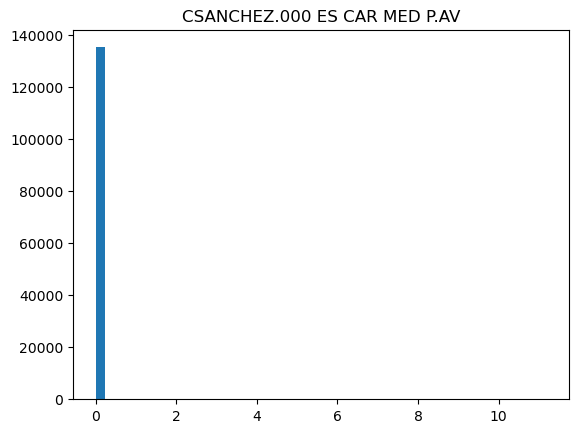

MDPLATA.000 ES CAR MED P.AV
[nan  0.  0. ...  0.  0.  0.]


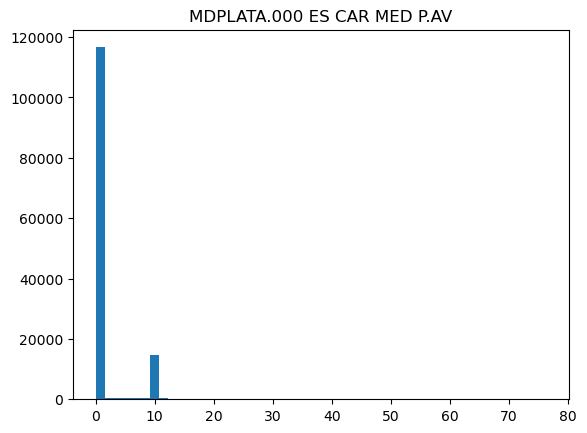

PINTADOB.000 ES CAR MED P.AV
[nan 0 0 ... 0.0 0.0 0.0]


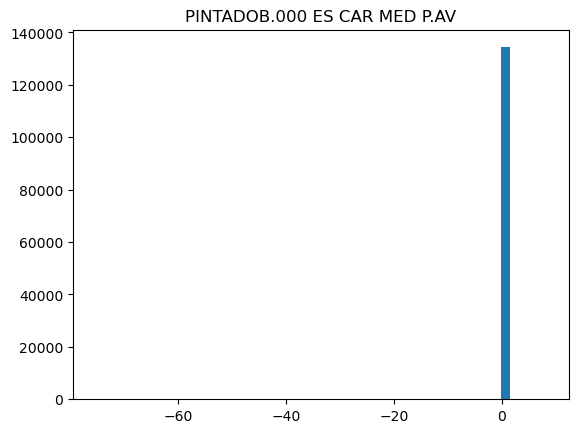

PPEREIRA.000 ES CAR MED P.AV
[nan 0 0 ... 0.702 0.702 0.702]


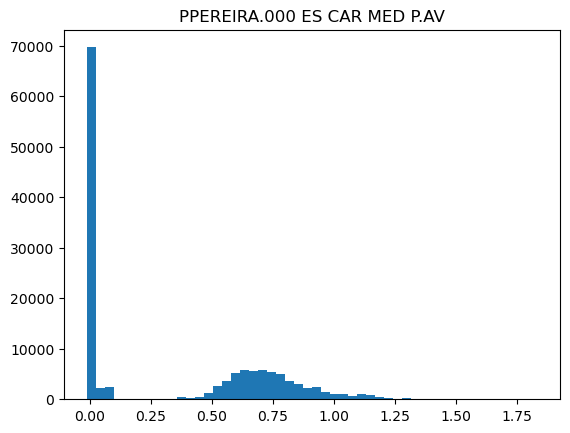

UPM2.000 ES CAR MED P.AV
[nan 0 0 ... 0.0 0.0 0.0]


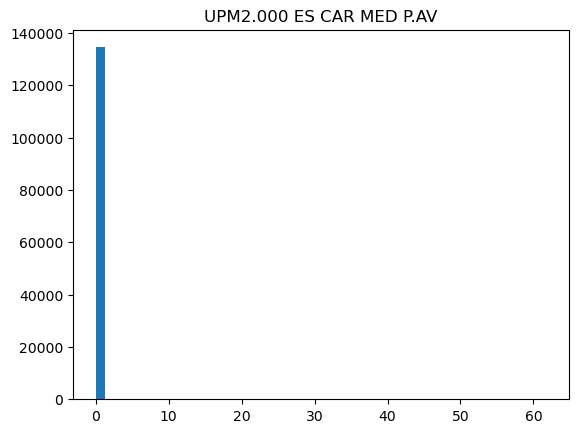

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Carga Activa.csv file
carga_activa = pd.read_csv('C:/Users/santi/GNN4OPF/Carga Activa.csv').replace('No Data', 0)

# Iterate over the columns in the dataframe
for column in carga_activa.columns.drop(['Unnamed: 0','Fecha', 'Hora','Control','CALCULOS.000 DE TOT MED P.AV']):
    # Check if the column is not in the dictionary values
    if column not in diccionario.keys():
        # Create a histogram for the column values
        print(column)
        # carga_activa[column].values
        print(carga_activa[column].values)
        plt.hist(carga_activa[column].values.astype(float), bins=50)
        plt.title(column)
        plt.show()


In [31]:
import numpy as np
np.array([9.54016017913818,
2.8499999046325684,
9.809999465942383,
31.23624038696289,
31.23624038696289,
4.399367809295654,
0,
0,
11.598299980163574,
0.5874999761581421,
0,
0,
17.590747833251953,
4.980416774749756,
1.6549999713897705,
7.386119842529297,
18.78851318359375,
10.876200675964355,
36.70556641,
0.031500001,
0,
14.74646282196045,
11.513587951660156,
11.87249755859375,
17.686317443847656,
35.86666488647461,
73.45503234863281,
43.58620834350586,
19.89679718017578,
41.77483367919922,
21.49571990966797,
29.25119972229004,
30.671249389648438,
13.58784008026123,
26.89257813,
49.07999801635742,
13.717915534973145,
-1.044159055,
32.50333786010742,
37.15046691894531,
11.293333053588867,
15.144368171691895,
32.89944076538086,
0,
4.998000144958496,
0,
10.718984603881836,
11.468790054321289,
15.084428787231445,
17.219999313354492,
25.753257751464844,
3.436000108718872,
41.310001373291016,
0,
20.700000762939453,
17.43785858154297,
2.056735038757324,
5.575500011444092,
31.130756378173828,
0,
6.309430122375488,
0]).sum()


995.5133065261535